<sup>This notebook is originally from https://github.com/lizanafj/UHI_mapping and licensed for reuse under [GPL-3.0 license].</sup>

# Data Pre-processing
---

This notebook filters raw data and flags suspicious values as wrong using different cleaning and quality control techniques

In [1]:
import os
import requests
import pandas as pd
import numpy as np
import json

# get folder location of script
cwd = os.getcwd()

## Define name of city project to work
---

Define the name of the **`city`** (projectname) to upload/save all data during the workflow

In [2]:
#City project: 
city= "London"

## Import input data of the project - config.py 
---

In [3]:
os.chdir(cwd)

In [4]:
cwd_main = cwd[:-10]
cwd_project = cwd_main + f"\projectname\{city}"
print(cwd_main)
print(cwd_project)

C:\Users\engs2371\Dropbox\4. OXFORD\2_CWS\00_CODIGO\CWS_TOOL_v3
C:\Users\engs2371\Dropbox\4. OXFORD\2_CWS\00_CODIGO\CWS_TOOL_v3\projectname\London


In [5]:
#import config.py file

# go to current location of script
os.chdir(cwd_project)
import config as cf

In [6]:
#check input variables
print("city: ",cf.city)
print("first date: ",cf.first_date)
print("last date: ",cf.last_date)
print("lat,long: ",cf.lat,cf.long)
print("plot: ",cf.plot)

city:  London
first date:  01-01-2021 00:00
last date:  31-12-2021 23:00
lat,long:  51.515313777970874 -0.1297586219709724
plot:  70


## Pre-processing
---

Update projectdata.json file with project variables

In [7]:
#go to script/process (code for cleaning and quality control)
os.chdir(cf.cwd_scripts_process)

In [8]:
#update input variables (json file) in script folder for extraction
d = {'city':cf.city,'lat':cf.lat,'long':cf.long, 
     'plot':cf.plot, 
     "first_date":cf.first_date,"last_date":cf.last_date,
     "first_date1":cf.first_date1,"last_date1":cf.last_date1,
    "color_net":cf.color_net, "color_wund":cf.color_wund,
    "color_ows":cf.color_ows, "color_cws":cf.color_cws,
    "color_outliers":cf.color_outliers}

with open('projectdata_p.json', 'w') as fp:
    json.dump(d, fp)

Run pre-processing

QC-I1 , 
    This function analyzes the data type in the sample.
    
    
QC-I3 , 
    This function eliminates data outside the following threshold: -40ºC and 60ºC.
    
    
QC-I4 , 
    This function eliminates data with a gradient higher than 20ºC/h.
    
    
QC-I5 , 
    This function eliminates data with a constant value longer than 6 hours.
    
    
QC-G4 , 
    This function eliminates data with duplicate values or missing values according to id, long and lat.
    
    
QC-G5 , 
    Normal distribution (or Student-t distribution if stations <100) is used to identify outliers: 
    lower and upper ends of the distribution at each time step. 

    z_score = alternatives:

    "z_score" = (t- mean(t))/std
    "mod_z_score_mad"=(t - median())/MAD
    "mod_z_score_qn"= (t - median())/Qn

    
QC-G6 , 
    Stations with outliers >20% of data are considered erroneous and eliminated. 
    This is formerly set per month.
    
    cutOff=0.2, monthly basis

    Data of sensors with co

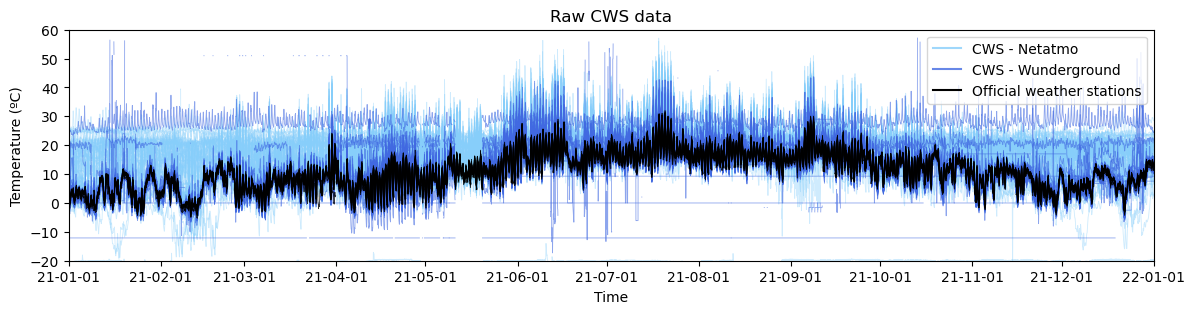

QC_I2 done
Outlier net:  0
Outlier wund:  0
Outlier OWS:  0
QC_I3 done
Outlier net:  3
Outlier wund:  45
Outlier OWS:  0
QC_I4 done


KeyboardInterrupt: 

In [10]:
os.chdir(cf.cwd_scripts_process)

%run B_DataPre-processing_v33_LONDON.py

## Statistics before and after pre-processing
---

Check statistics before and after the pre-processing techniques

In [11]:
os.chdir(cf.cwd_reports)
os.listdir()

['figures',
 'Pre-processing_London_2021_CWS_all_G8_g8_Statistics.csv',
 'Pre-processing_London_2021_OWS_all_G8_g8_Statistics.csv']

In [12]:
#Read stats from CWS before and after each pre-processing step
CWS_stats = pd.read_csv("Pre-processing_London_2021_CWS_all_G8_g8_Statistics.csv", sep=",")

In [13]:
CWS_stats

,Unnamed: 0,QC level,Size of DataFrame,Number of available data,Available data (%),Number of available CWS,Outliers identified (%),Accumulated outliers (%)
0,0,raw,15813605,13776904,87.120578,1805,0.000000,0.000000
1,1,QC_I3,15813605,13776904,87.120578,1805,0.000000,0.000000
2,2,QC_I4,15813605,13776856,87.120274,1805,-0.000348,-0.000348
3,3,QC_I5,15813605,13682187,86.521619,1805,-0.687160,-0.687506
4,4,QC_G4,15813605,13681726,86.518703,1805,-0.003369,-0.690852
5,5,QC_G5,15813605,12394220,78.376942,1805,-9.410406,-10.036246
6,6,QC_G6,14578304,11923913,81.792182,1664,-3.794567,-13.449981
7,7,QC_G7,14578304,11822180,81.094344,1664,-0.853185,-14.188413
8,8,QC_G8,14578304,11963328,82.062550,1664,1.193925,-13.163886


In [14]:
#Read stats from OWS before and after each pre-processing step
OWS_stats = pd.read_csv("Pre-processing_London_2021_OWS_all_G8_g8_Statistics.csv", sep=",")

In [15]:
OWS_stats

,Unnamed: 0,QC level,Size of DataFrame,Number of available data,Available data (%),Number of available CWS,Outliers identified (%),Accumulated outliers (%)
0,0,raw,105120,96416,91.719939,12,0.00000,0.00000
1,1,QC_I3,105120,96416,91.719939,12,0.00000,0.00000
2,2,QC_I4,105120,96416,91.719939,12,0.00000,0.00000
3,3,QC_I5,105120,96377,91.682839,12,-0.04045,-0.04045
